# Reconnaissance d'entités nommées avec SpaCy

La documentation est accessible ici: https://spacy.io/api

## Imports

In [30]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
from collections import Counter
from wordcloud import WordCloud #besoin de compilateur c++ pour l'installer
import os

from IPython.display import Image
%pip install  fr_core_news_md

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
try:
	nlp = spacy.load("fr_core_news_md")
except Exception as e:
	# If loading fails (e.g. model/version mismatch), try to download a compatible model and load it
	try:
		import spacy.cli
		spacy.cli.download("fr_core_news_md")
		nlp = spacy.load("fr_core_news_md")
	except Exception:
		# Fallback: create a blank French pipeline to avoid RegistryError.
		# Note: a blank pipeline has no pretrained NER, so doc.ents will be empty.
		nlp = spacy.blank("fr")

In [3]:
spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [20]:
# Charger le texte
n=1000000
text = open("../../data/halley/halley_all.txt", encoding='utf-8').read()[:n]

In [21]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 40.9 s
Wall time: 41.7 s


In [22]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [23]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Gordon apparait 21 fois dans le corpus
René apparait 16 fois dans le corpus
Léopold II apparait 15 fois dans le corpus
Monsieur apparait 14 fois dans le corpus
Charles apparait 13 fois dans le corpus
Monseigneur apparait 11 fois dans le corpus
Christ apparait 10 fois dans le corpus
Rubens apparait 10 fois dans le corpus
Reine apparait 10 fois dans le corpus
Albert apparait 9 fois dans le corpus
Paul apparait 9 fois dans le corpus
Paulette apparait 9 fois dans le corpus
M. Heynen apparait 9 fois dans le corpus
Pape apparait 9 fois dans le corpus
Cath apparait 9 fois dans le corpus
Grandet apparait 8 fois dans le corpus
Henri apparait 8 fois dans le corpus
Vitellius apparait 8 fois dans le corpus
M. Henry apparait 8 fois dans le corpus
Boïtchenko apparait 7 fois dans le corpus
Edouard VII apparait 7 fois dans le corpus
Voltaire apparait 7 fois dans le corpus
Marche apparait 7 fois dans le corpus
Messieurs apparait 7 fois dans le corpus
Patin apparait 7 fois dans le corpus
Triquet apparai

In [24]:
len(people)

3097

Lister les lieux (LOC) 

In [25]:
location = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" and len(ent.text) > 3:
        location[ent.text] += 1

# Trier et imprimer
sorted_locations = sorted(location.items(), key=lambda kv: kv[1], reverse=True)

for loc, freq in sorted_locations[:50]:
    print(f"{loc} apparait {freq} fois dans le corpus")

len(location)



Belgique apparait 96 fois dans le corpus
Arlon apparait 93 fois dans le corpus
Bruxelles apparait 85 fois dans le corpus
Etat apparait 45 fois dans le corpus
Paris apparait 42 fois dans le corpus
Liège apparait 33 fois dans le corpus
Congo apparait 32 fois dans le corpus
Allemagne apparait 28 fois dans le corpus
France apparait 26 fois dans le corpus
Anvers apparait 26 fois dans le corpus
Angleterre apparait 25 fois dans le corpus
Luxembourg apparait 23 fois dans le corpus
Berlin apparait 17 fois dans le corpus
Belges apparait 17 fois dans le corpus
Namur apparait 17 fois dans le corpus
Cologne apparait 16 fois dans le corpus
Etats-Unis apparait 15 fois dans le corpus
de France apparait 15 fois dans le corpus
Russie apparait 14 fois dans le corpus
Virton apparait 14 fois dans le corpus
Mignon apparait 14 fois dans le corpus
la France apparait 13 fois dans le corpus
Moscou apparait 12 fois dans le corpus
Europe apparait 11 fois dans le corpus
Londres apparait 11 fois dans le corpus
la T

2533

Top 100 locations: ['Belgique', 'Arlon', 'Bruxelles', 'Etat', 'Paris', 'Liège', 'Congo', 'Allemagne', 'France', 'Anvers', 'Angleterre', 'Luxembourg', 'Berlin', 'Belges', 'Namur', 'Cologne', 'Etats-Unis', 'de France', 'Russie', 'Virton', 'Mignon', 'la France', 'Moscou', 'Europe', 'Londres', 'la Terre', 'Amérique', 'Français', 'Anglais', 'Espagne', 'Maure', 'Soudan', 'soleil', 'Marseille', 'Avoine', 'ARLON', 'Belge', 'colportages', 'Australie', 'Américains', 'Washington', 'Nord', 'Hollande', 'Madrid', 'Rome', "rue d'Argent", 'Bouillon', 'St-Hubert', 'Verviers', 'de Belgique', 'Chine', 'la Chine', 'New-York', 'Bruges', 'Italie', 'Marbehan', 'Gand', 'La Haye', 'Brabant', 'Afrique', 'Erezée', 'Vénus', 'Civilis', 'Corbion', 'Ghetto', "l'Europe", 'Ardenne', 'Hainaut', "l'Italie", 'Portugal', 'Grand-Duché', 'Palais de Justice', 'Turquie', 'Durbuy', 'Vielsalm', 'Rue de Luxembourg', 'Bertrix', 'Etalle', 'Neufchâteau', 'BRUXELLES', 'Suède', 'Naamloos', 'Tirlemont', 'Uccle', 'Tubize', 'Danemark', 

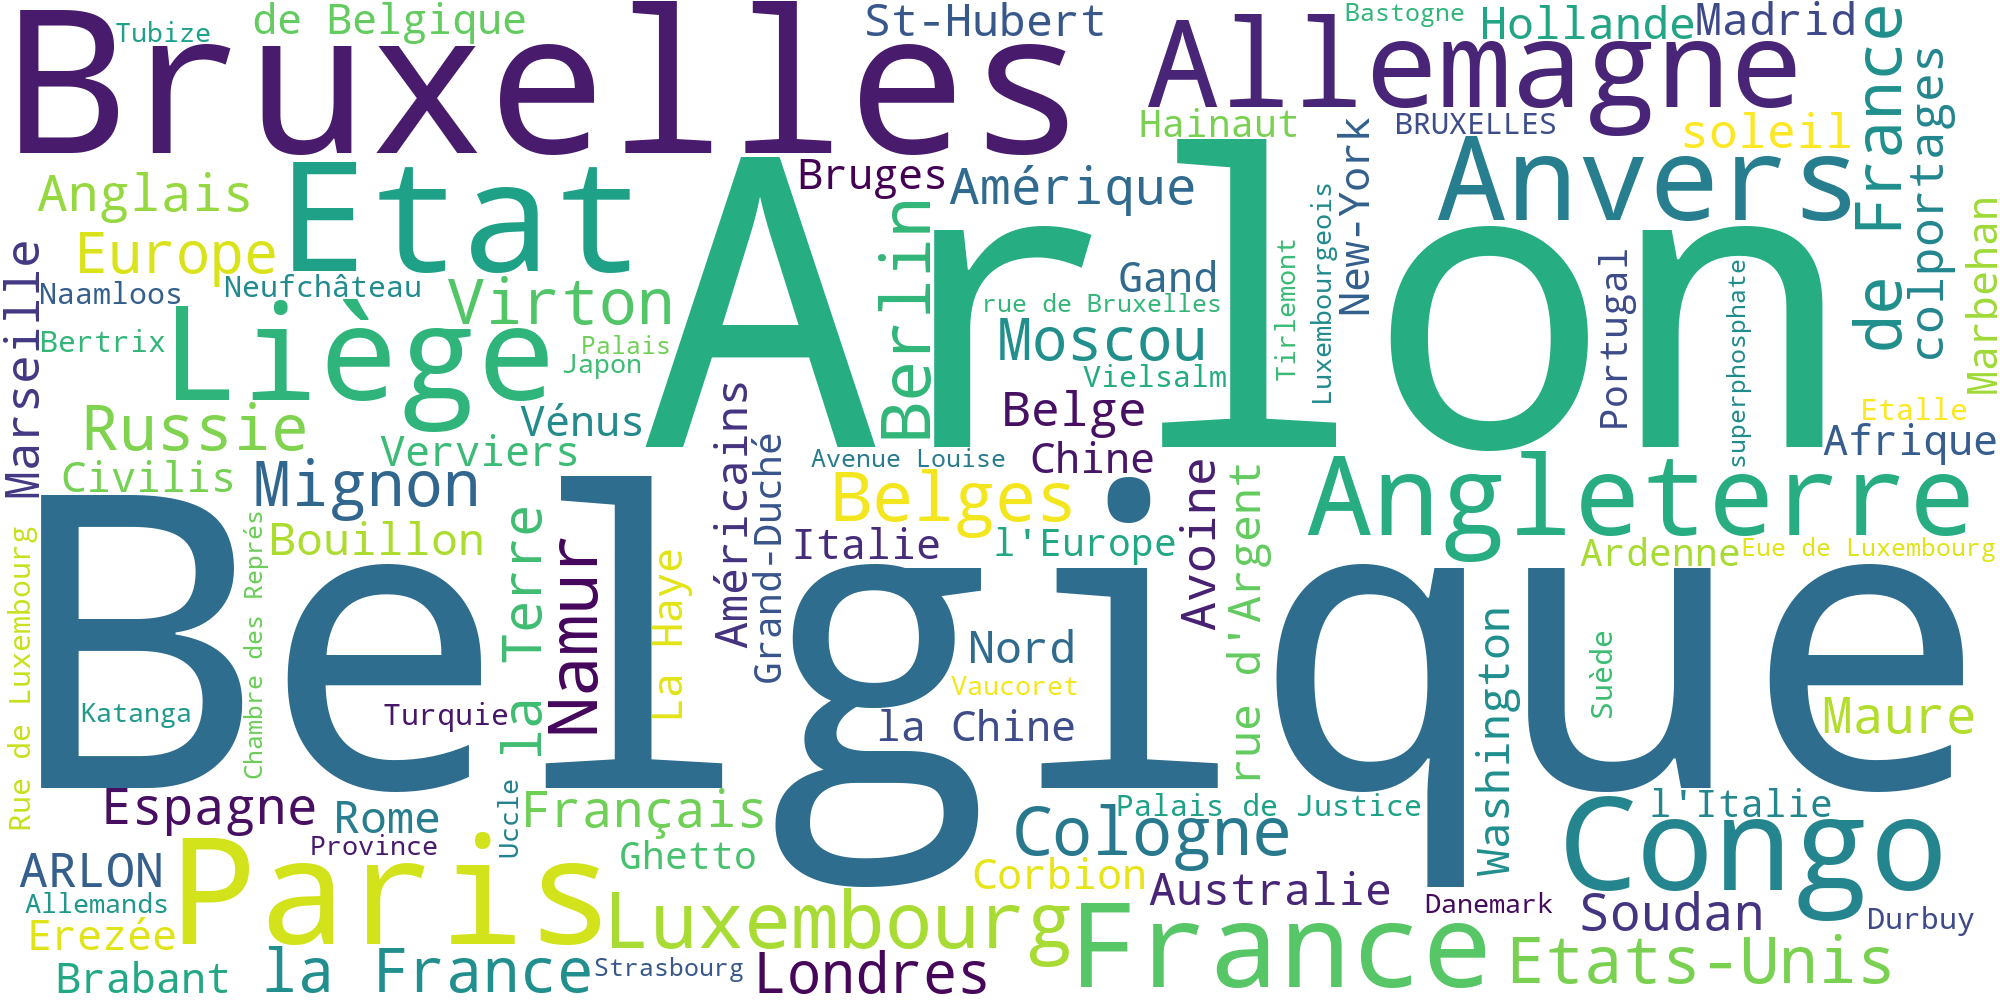

In [31]:
# Word cloud of top 200 KEYWORDS from all files

# Flatten all keywords
#all_keywords_flat = [kw for kws in all_token_keywords.values() for kw, score in kws]

# Count frequencies
loc_freq = Counter(location)
top_100_loc = dict(loc_freq.most_common(100))

print(f"Top 100 locations: {list(top_100_loc.keys())}")

# Create and save word cloud
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(top_100_loc)
cloud.to_file(os.path.join(temp_path, "halley_locations_top100.png"))
Image(filename=os.path.join(temp_path, "halley_locations_top100.png"))

In [26]:
organisation = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "ORG" and len(ent.text) > 3:
        organisation[ent.text] += 1

# Trier et imprimer
sorted_organisations = sorted(organisation.items(), key=lambda kv: kv[1], reverse=True)

for org, freq in sorted_organisations[:50]:
    print(f"{org} apparait {freq} fois dans le corpus")

len(organisation)

Chambre apparait 14 fois dans le corpus
Sénat apparait 8 fois dans le corpus
Gouvernement apparait 7 fois dans le corpus
Téléphone apparait 7 fois dans le corpus
Demandez apparait 6 fois dans le corpus
Union Soviétique apparait 5 fois dans le corpus
Conseil apparait 5 fois dans le corpus
Parlement apparait 5 fois dans le corpus
ROSÉE apparait 5 fois dans le corpus
Téléph apparait 5 fois dans le corpus
Tokio apparait 5 fois dans le corpus
Académie apparait 4 fois dans le corpus
Comité apparait 4 fois dans le corpus
Avenir apparait 4 fois dans le corpus
Jésuites apparait 4 fois dans le corpus
Compagnie apparait 4 fois dans le corpus
I'Agence Havas apparait 4 fois dans le corpus
Académie des sciences apparait 3 fois dans le corpus
Aleoute apparait 3 fois dans le corpus
Fran¬ apparait 3 fois dans le corpus
Parti apparait 3 fois dans le corpus
Administration apparait 3 fois dans le corpus
Collège apparait 3 fois dans le corpus
Peuple apparait 3 fois dans le corpus
Commission apparait 3 fois

784